In [8]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_rsi, plot_function
from FilterFunctions import cci_rsi_filter_indicators


In [9]:
### Load in Stock Data
tickers = ['CELH', 'LI', 'AMD', 'TSM', 'BA', 'RDDT', 'ONCT', 'PFE', 'STT', 'MSAI', 'WNS', 'TSLA', 'TNON', 'BTDR', 'RRGB', 'AVO', 'JPM', 'EL', 'CRDO', 'VC', 'BLK', 'APLD', 'LCID', 'ORCL', 'RIVN', 'RUN', 'QS', 'GME', 'CISS', 'ALLR', 'SCHW', 'TMO', 'ZM', 'NMRK', 'HD', 'PYPL', 'IBM', 'BABA', 'PINS', 'SPOT', 'XOM', 'CRSR', 'LMND', 'SE', 'JNJ', 'EXC', 'ABNB', 'ETSY', 'CVX', 'ACN', 'SNAP', 'NIO', 'SBUX', 'AAPL', 'MRO', 'CSCO', 'UPST', 'CRM', 'NKE', 'LYV', 'TDOC', 'ACRS', 'MCD', 'KO']
start_date = '2018-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail(5)

[*********************100%%**********************]  64 of 64 completed


Price        Date       Close                                         \
Ticker                   AAPL        ABNB         ACN   ACRS    ALLR   
1590   2024-04-29  173.500000  162.250000  303.160004  1.220  1.3800   
1591   2024-04-30  170.330002  158.570007  300.910004  1.210  1.2700   
1592   2024-05-01  169.300003  156.160004  298.660004  1.260  1.3700   
1593   2024-05-02  173.029999  158.330002  300.339996  1.310  1.2300   
1594   2024-05-03         NaN  160.369995  304.670013  1.365  1.0182   

Price                                         ...     Low                     \
Ticker         AMD   APLD    AVO          BA  ...    TDOC         TMO   TNON   
1590    160.199997  2.710  11.46  173.490005  ...  12.880  571.299988  0.730   
1591    158.380005  2.705  11.35  167.839996  ...  12.735  567.969971  0.722   
1592    144.270004  3.000  11.56  171.460007  ...  12.530  568.400024  0.760   
1593    146.160004  2.960  11.79  178.850006  ...  12.600  565.489990  0.760   
1594    150.380005  3.010  11.77  179.070007  ...  12.960  574.104980  0.830   

Price                                                                         \
Ticker        TSLA         TSM       UPST          VC        WNS         XOM   
1590    184.539993  135.910004  22.830000  111.059998  40.020000  117.760002   
1591    182.839996  137.259995  22.090000  110.070000  41.770000  117.980003   
1592    179.009995  133.210007  22.010000  110.629997  41.610001  115.660004   
1593    176.020004  133.220001  22.879999  113.330002  43.139999  115.900002   
1594    178.539993  138.759995  23.639999  114.264999  44.509998  114.129997   

Price              
Ticker         ZM  
1590    62.500000  
1591    60.889999  
1592    60.689999  
1593    61.799999  
1594    61.680000  

[5 rows x 193 columns]

In [10]:
### Compute RSI for Multiple Tickers 
rsi_df, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers)
print(rsi_df.tail(5))
#print("RSI values list: ", rsi_vals)

           CELH         LI        AMD        TSM         BA       RDDT  \
1590  24.592474  31.859075  40.181882  39.551793  42.223718  52.760998   
1591  22.222233  30.752539  41.586633  36.690634  39.367340  55.314334   
1592  29.910507  32.901756  29.119564  32.374928  47.228711  53.197541   
1593  37.929476  48.567436  35.107863  39.980867  62.282106  63.134975   
1594  56.153175  46.675622  41.538982  51.545486  65.474563  69.022052   

           ONCT        PFE        STT       MSAI  ...        MRO       CSCO  \
1590  48.076918  35.384597  38.159058  47.115381  ...  32.368416  24.367790   
1591  44.772123  39.884401  40.978862  45.937504  ...  18.485523  24.367790   
1592  40.281691  58.400008  46.219268  48.355265  ...  16.533868  17.745776   
1593  40.864713  68.253980  35.340904  51.543208  ...  17.811158  23.270399   
1594  49.078721  65.889220  46.252067  49.354839  ...  22.172948  32.718879   

           UPST        CRM        NKE        LYV       TDOC       ACRS  \
1590  

In [11]:
### Filter based on constraints:
    # Below 30 - indicate oversold conditions which generates a potential BUY signal, expect the price to rebound or correct upward after being oversold from downward selling pressure
    # Above 70 - indicate overbought conditions which generates a potential SELL signal
### Filter Function Call
filtered_df = cci_rsi_filter_indicators(rsi_df, 70, 30, rsi_df.columns)
filtered_df.tail(5)

Tickers with potential BUY signals:
RRGB: 89.106754
JPM: 70.049169
LCID: 73.333342
RIVN: 70.406912
GME: 77.102808
SCHW: 77.139471
BABA: 80.413842
PINS: 87.013002
SE: 80.877054
SNAP: 87.491977
NIO: 83.681998
ACRS: 74.603166
KO: 91.703037

Tickers with potential SELL signals:
ALLR: 17.312558
IBM: 25.26034
SBUX: 22.87403
MRO: 22.172948
LYV: 21.618946


,RRGB,JPM,LCID,RIVN,GME,ALLR,SCHW,IBM,BABA,PINS,SE,SNAP,NIO,SBUX,MRO,LYV,ACRS,KO
1590,66.770189,43.735848,36.486475,36.559139,52.671755,6.324110,62.050725,16.585199,61.046528,43.188841,67.806270,71.113993,47.417837,57.444192,32.368416,23.326041,55.999989,69.661009
1591,70.491808,43.934969,43.243229,35.639406,52.272726,7.017542,66.029225,17.687283,50.841975,49.555957,63.697411,76.292559,53.051635,68.039777,18.485523,23.003894,60.869574,76.536339
1592,68.728526,44.210198,59.090909,45.890415,46.215136,17.968211,71.871488,16.795530,52.083343,76.606275,66.402260,77.239709,65.882351,22.766163,16.533868,19.711965,59.090899,76.666688
1593,80.645161,74.116397,67.901244,57.675436,65.669293,18.705037,78.804326,19.647794,76.432730,79.794535,76.380699,83.272274,79.365074,25.693430,17.811158,20.343695,69.230752,89.552281
1594,89.106754,70.049169,73.333342,70.406912,77.102808,17.312558,77.139471,25.260340,80.413842,87.013002,80.877054,87.491977,83.681998,22.874030,22.172948,21.618946,74.603166,91.703037


[*********************100%%**********************]  2 of 2 completed


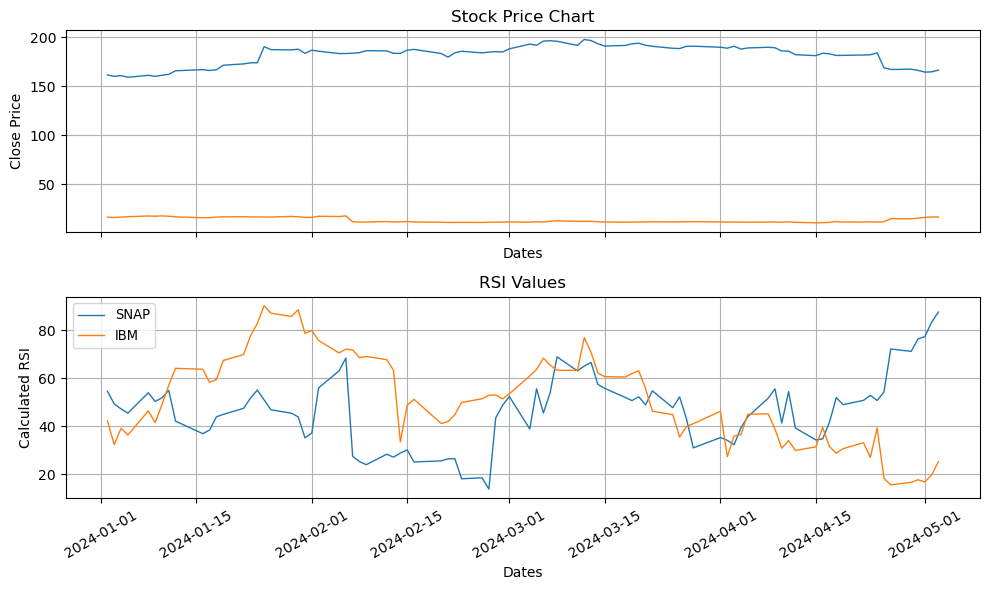

In [12]:
### Plot RSI for chosen ticker
# Create a list of tickers you want to plot
tickers_to_plot = ['SNAP', 'IBM']
stock_data_to_plot = import_stock_data(tickers_to_plot, start_date)
rsi_df_to_plot, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers_to_plot)

# Call plot_function with the correct arguments
plot = plot_function(stock_data_to_plot, rsi_df_to_plot, tickers = tickers_to_plot, indicator_type = 'RSI')
plot